In [408]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [409]:
# Type your Loan.csv path
file_path = 'Loan.csv'

# Loading Data
df = pd.read_csv(file_path)
print(df.describe())
df.head()

                Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  20000.000000   20000.000000  20000.000000  20000.000000   20000.000000   
mean      39.752600   59161.473550    571.612400     17.522750   24882.867800   
std       11.622713   40350.845168     50.997358     11.316836   13427.421217   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       32.000000   31679.000000    540.000000      9.000000   15575.000000   
50%       40.000000   48566.000000    578.000000     17.000000   21914.500000   
75%       48.000000   74391.000000    609.000000     25.000000   30835.000000   
max       80.000000  485341.000000    712.000000     61.000000  184732.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  20000.000000        20000.000000         20000.000000   
mean      54.057000            1.517300           454.292700   
std       24.664857            1.386325           240.507609   
min       12.0

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

In [410]:
# UtilityBillsPaymentHistory removed
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PaymentHistory',
    'LoanApproved'
]

numeric_columns = [
    'Age',
    'AnnualIncome',
    'CreditScore',
    'Experience',
    'LoanAmount',
    'LoanDuration',
    'NumberOfDependents',
    'MonthlyDebtPayments',
    'CreditCardUtilizationRate',
    'NumberOfOpenCreditLines',
    'NumberOfCreditInquiries',
    'DebtToIncomeRatio',
    'PreviousLoanDefaults',
    'LengthOfCreditHistory',
    'SavingsAccountBalance',
    'CheckingAccountBalance',
    'TotalAssets',
    'TotalLiabilities',
    'MonthlyIncome',
    'JobTenure',
    'NetWorth',
    'BaseInterestRate',
    'InterestRate',
    'MonthlyLoanPayment',
    'TotalDebtToIncomeRatio',
    'RiskScore'
]

In [411]:
# Change column types where applicable
# UtilityBillsPaymentHistory removed
# Check and remove 'UtilityBillsPaymentHistory' column if it exists
if 'UtilityBillsPaymentHistory' in df.columns:
    df = df.drop('UtilityBillsPaymentHistory', axis=1)

for col in categorical_columns:
    df[col] = df[col].astype('category')

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'ApplicationDate' to datetime
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'], errors='coerce')

# Compute the summary statistics for numeric columns
summary = df.head()

# Print the summary
print(summary)

print('\n min, max, mean only')
Min_Max_Mean=df.describe(include=[float, int]).loc[["min", "max", "mean"]]
print(Min_Max_Mean)


  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   TotalLiabilities MonthlyIncome  JobTenure  NetWorth  BaseInterestRate  \
0             19183   3329.000000       

In [412]:
print(df[df.isna().any(axis=1)]) # Show the na in the data frame
missing_values =df.isnull().sum()
print(missing_values)

Empty DataFrame
Columns: [ApplicationDate, Age, AnnualIncome, CreditScore, EmploymentStatus, EducationLevel, Experience, LoanAmount, LoanDuration, MaritalStatus, NumberOfDependents, HomeOwnershipStatus, MonthlyDebtPayments, CreditCardUtilizationRate, NumberOfOpenCreditLines, NumberOfCreditInquiries, DebtToIncomeRatio, BankruptcyHistory, LoanPurpose, PreviousLoanDefaults, PaymentHistory, LengthOfCreditHistory, SavingsAccountBalance, CheckingAccountBalance, TotalAssets, TotalLiabilities, MonthlyIncome, JobTenure, NetWorth, BaseInterestRate, InterestRate, MonthlyLoanPayment, TotalDebtToIncomeRatio, LoanApproved, RiskScore]
Index: []

[0 rows x 35 columns]
ApplicationDate              0
Age                          0
AnnualIncome                 0
CreditScore                  0
EmploymentStatus             0
EducationLevel               0
Experience                   0
LoanAmount                   0
LoanDuration                 0
MaritalStatus                0
NumberOfDependents           

### Correlation

In [413]:
df = df.drop(columns=['ApplicationDate'])

df_encoded = pd.get_dummies(df, drop_first=True) # One-hot encoding categorical variables

# Point-Biserial Correlation for continuous features with binary target (LoanApproved)
point_biserial_correlations = {}

for column in numeric_columns:
    correlation, p_value = pointbiserialr(df_encoded[column], df_encoded['LoanApproved_1'])
    point_biserial_correlations[column] = correlation

# Chi-Square Test of Independence for categorical features with binary target (without LoanApproved)
categorical_columns = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'HomeOwnershipStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PaymentHistory'
]
chi_square_p_values = {}

encoded_columns = [col for col in df_encoded.columns if col not in categorical_columns]

for column in encoded_columns:
    contingency_table = pd.crosstab(df_encoded[column], df_encoded['LoanApproved_1'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi_square_p_values[column] = p_value

In [414]:
# Convert the point-biserial correlation dictionary to a DataFrame
point_biserial_correlations_df = pd.DataFrame(list(point_biserial_correlations.items()), columns=['Feature', 'Correlation'])

# Print the resulting DataFrame
print("\nPoint-Biserial Correlation for continuous features:")
point_biserial_correlations_df


Point-Biserial Correlation for continuous features:


Feature  Correlation
0                         Age     0.141029
1                AnnualIncome     0.597900
2                 CreditScore     0.142000
3                  Experience     0.140755
4                  LoanAmount    -0.239496
5                LoanDuration    -0.094558
6          NumberOfDependents     0.001717
7         MonthlyDebtPayments    -0.070415
8   CreditCardUtilizationRate    -0.010466
9     NumberOfOpenCreditLines    -0.004769
10    NumberOfCreditInquiries    -0.005885
11          DebtToIncomeRatio     0.000034
12       PreviousLoanDefaults    -0.065343
13      LengthOfCreditHistory     0.105949
14      SavingsAccountBalance     0.000961
15     CheckingAccountBalance     0.000660
16                TotalAssets     0.184011
17           TotalLiabilities    -0.029434
18              MonthlyIncome     0.604101
19                  JobTenure     0.004997
20                   NetWorth     0.187892
21           BaseInterestRate    -0.247263
22               InterestRate    -0.301646
23         MonthlyLoanPayment    -0.184272
24     TotalDebtToIncomeRatio    -0.410399
25                  RiskScore    -0.766137

In [415]:
# Convert the chi-square p-values dictionary to a DataFrame
chi_square_p_values_df = pd.DataFrame(list(chi_square_p_values.items()), columns=['Feature', 'P-Value'])

# Print the resulting DataFrame
print("\nChi-Square p-values:")
chi_square_p_values_df


Chi-Square p-values:


Feature       P-Value
0                 Age  1.343140e-68
1        AnnualIncome  7.169535e-16
2         CreditScore  2.678344e-35
3          Experience  2.126412e-69
4          LoanAmount  7.675432e-01
..                ...           ...
76  PaymentHistory_42  1.000000e+00
77  PaymentHistory_43  9.709007e-01
78  PaymentHistory_44  1.000000e+00
79  PaymentHistory_45  5.405297e-01
80     LoanApproved_1  0.000000e+00

[81 rows x 2 columns]

In [416]:
# Set significance level (alpha) for correlation
alpha = 0.05

# Filter features where the p-value is less than alpha (significantly correlated)
significant_features = chi_square_p_values_df[chi_square_p_values_df['P-Value'] < alpha]

# Print the significant features
print("\nSignificant Features (p-value < 0.05):")
print(significant_features)


Significant Features (p-value < 0.05):
                           Feature       P-Value
0                              Age  1.343140e-68
1                     AnnualIncome  7.169535e-16
2                      CreditScore  2.678344e-35
3                       Experience  2.126412e-69
5                     LoanDuration  2.764140e-44
12            PreviousLoanDefaults  3.163768e-20
13           LengthOfCreditHistory  4.035107e-37
18                   MonthlyIncome  4.439482e-16
20                        NetWorth  1.056706e-02
25                       RiskScore  0.000000e+00
26  EmploymentStatus_Self-Employed  1.498971e-04
27     EmploymentStatus_Unemployed  2.665115e-07
28         EducationLevel_Bachelor  2.284575e-09
29        EducationLevel_Doctorate  3.440071e-50
30      EducationLevel_High School  1.343826e-91
31           EducationLevel_Master  1.372586e-55
35       HomeOwnershipStatus_Other  1.511918e-04
37        HomeOwnershipStatus_Rent  1.386023e-02
38             BankruptcyHist

In [417]:
# Remove RiskScore since it is directly correlated and target
strings_to_drop = ['RiskScore', 'LoanApproved_1']
significant_features = significant_features[~significant_features['Feature'].isin(strings_to_drop)]

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

LoanApproved
0    76.1
1    23.9
Name: count, dtype: float64


Age  AnnualIncome  CreditScore EmploymentStatus EducationLevel  Experience  \
0   45         39948          617         Employed         Master          22   
1   38         39709          628         Employed      Associate          15   
2   47         40724          570         Employed       Bachelor          26   
3   58         69084          545         Employed    High School          34   
4   37        103264          594         Employed      Associate          17   

   LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  ...  \
0       13152            48       Married                   2  ...   
1       26045            48        Single                   1  ...   
2       17627            36       Married                   2  ...   
3       37898            96        Single                   1  ...   
4        9184            36       Married                   1  ...   

  TotalLiabilities  MonthlyIncome  JobTenure  NetWorth  BaseInterestRate  \
0            19183    3329.000000         11    126928          0.199652   
1             9595    3309.083333          3     43609          0.207045   
2           128874    3393.666667          6      5205          0.217627   
3             5370    5757.000000          5     99452          0.300398   
4            17286    8605.333333          5    227019          0.197184   

   InterestRate MonthlyLoanPayment TotalDebtToIncomeRatio  LoanApproved  \
0      0.227590         419.805992               0.181077             0   
1      0.201077         794.054238               0.389852             0   
2      0.212548         666.406688               0.462157             0   
3      0.300911        1047.506980               0.313098             0   
4      0.175990         330.179140               0.070210             1   

  RiskScore  
0      49.0  
1      52.0  
2      52.0  
3      54.0  
4      36.0  

[5 rows x 34 columns]

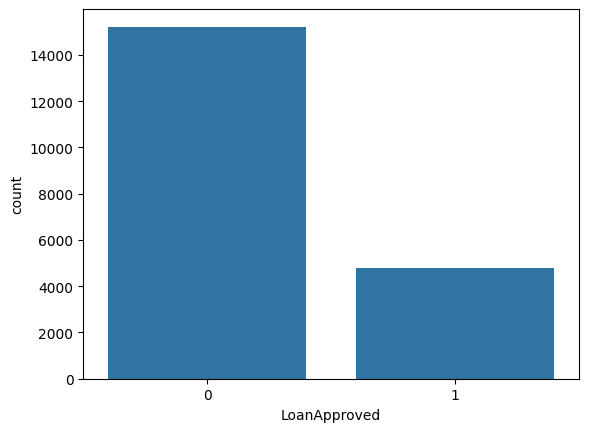

In [418]:
print(df['LoanApproved'].value_counts())
print()
print((df['LoanApproved'].value_counts() / df['LoanApproved'].value_counts().sum()) * 100)

sns.countplot(data=df, x='LoanApproved')
df.head()

### CART

In [419]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1'])     # Features
target = df_encoded['LoanApproved_1']                    # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

model = DecisionTreeClassifier()

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test,target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.9902

 Confusion Matrix:
[[3791   20]
 [  29 1160]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.99      0.99      3811
        True       0.98      0.98      0.98      1189

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [420]:
# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1', 'RiskScore'])     # Features (without RiskScore)
target = df_encoded['LoanApproved_1']                                 # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

model = DecisionTreeClassifier()

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.894

 Confusion Matrix:
[[3556  255]
 [ 275  914]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.93      0.93      3811
        True       0.78      0.77      0.78      1189

    accuracy                           0.89      5000
   macro avg       0.86      0.85      0.85      5000
weighted avg       0.89      0.89      0.89      5000



In [421]:
# List of features extracted from the given data
selected_features = list(significant_features['Feature'])

# Filter the DataFrame to include only the selected features (based off p-value)
attr = df_encoded[selected_features]            # Features
target = df_encoded['LoanApproved_1']           # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

model = DecisionTreeClassifier()

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8242

 Confusion Matrix:
[[3418  393]
 [ 486  703]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.90      0.89      3811
        True       0.64      0.59      0.62      1189

    accuracy                           0.82      5000
   macro avg       0.76      0.74      0.75      5000
weighted avg       0.82      0.82      0.82      5000



### C5.0

In [422]:
# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1', 'RiskScore'])     # Features (without RiskScore)
target = df_encoded['LoanApproved_1']                                 # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

results = []

# Loop through values for max_depth and max_leaf_nodes
for max_depth in range(1, 11):
    for max_leaf_nodes in range(2, 11):
        model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
        
        model.fit(attr_train,target_train)
        target_pred = model.predict(attr_test)

        results.append({
            "max_depth": max_depth,
            "max_leaf_nodes": max_leaf_nodes,
            "accuracy": accuracy_score(target_test, target_pred)
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by="accuracy", ascending=False)

max_depth  max_leaf_nodes  accuracy
89         10              10    0.8744
32          4               7    0.8744
34          4               9    0.8744
35          4              10    0.8744
39          5               5    0.8744
..        ...             ...       ...
5           1               7    0.8212
4           1               6    0.8212
3           1               5    0.8212
2           1               4    0.8212
45          6               2    0.8212

[90 rows x 3 columns]

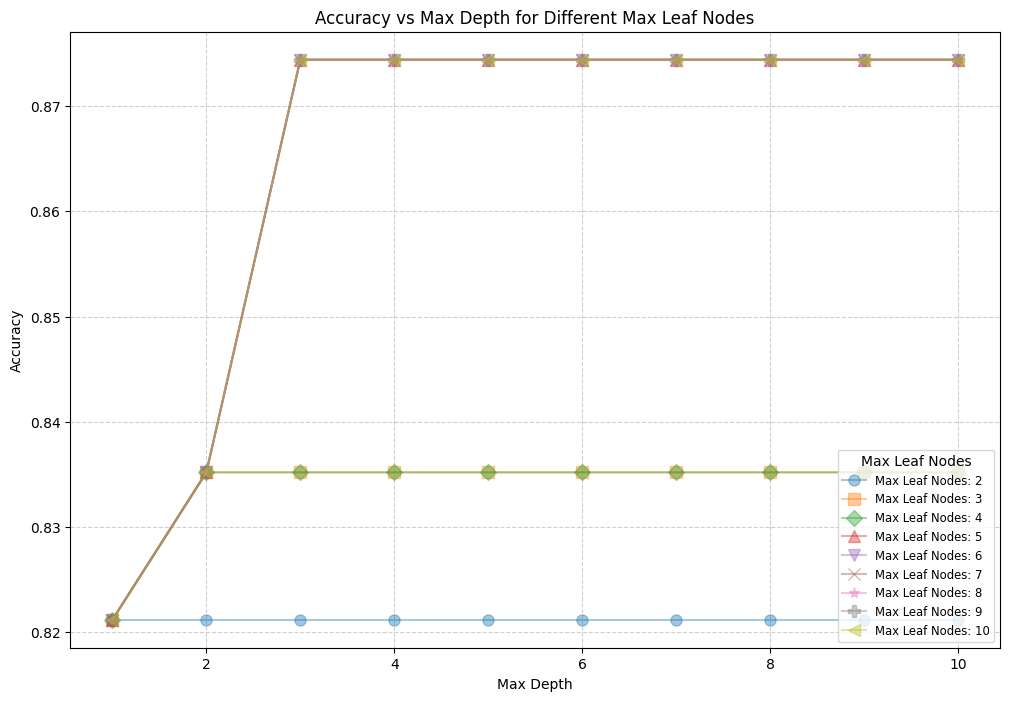

In [423]:
import matplotlib.pyplot as plt

# Define marker styles to differentiate each line
marker_styles = ['o', 's', 'D', '^', 'v', 'x', '*', 'P', '<', '>']

plt.figure(figsize=(12, 8))

# Loop through unique values of max_leaf_nodes
for idx, max_leaf_nodes in enumerate(results_df['max_leaf_nodes'].unique()):
    subset = results_df[results_df['max_leaf_nodes'] == max_leaf_nodes]
    plt.plot(
        subset['max_depth'], 
        subset['accuracy'], 
        marker=marker_styles[idx % len(marker_styles)],
        label=f"Max Leaf Nodes: {max_leaf_nodes}",
        alpha=0.4,
        linewidth=1.5,
        markersize=8
    )

# Add labels, title, legend, and grid
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Different Max Leaf Nodes')
plt.legend(title="Max Leaf Nodes", loc='lower right', fontsize='small')  # Adjust legend size
plt.grid(True, linestyle='--', alpha=0.6)  # Lighter gridlines for better readability

# Show the plot
plt.show()

In [424]:
# Sort the DataFrame by accuracy (descending), then max_depth and max_leaf_nodes (ascending)
optimal_result = (
    results_df.sort_values(by=["accuracy", "max_depth", "max_leaf_nodes"], ascending=[False, True, True])
    .iloc[0]
)

# Display the result
print("Optimal Result:")
print(optimal_result)

Optimal Result:
max_depth         3.0000
max_leaf_nodes    5.0000
accuracy          0.8744
Name: 21, dtype: float64


In [425]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8744

 Confusion Matrix:
[[3550  261]
 [ 367  822]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.93      0.92      3811
        True       0.76      0.69      0.72      1189

    accuracy                           0.87      5000
   macro avg       0.83      0.81      0.82      5000
weighted avg       0.87      0.87      0.87      5000



In [426]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model, fontsize=20, filled=True, feature_names=attr.columns)

[Text(0.5, 0.875, 'TotalDebtToIncomeRatio <= 0.224\nentropy = 0.794\nsamples = 15000\nvalue = [11409, 3591]'),
 Text(0.25, 0.625, 'TotalDebtToIncomeRatio <= 0.116\nentropy = 0.983\nsamples = 5278\nvalue = [2236, 3042]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'entropy = 0.572\nsamples = 1550\nvalue = [210.0, 1340.0]'),
 Text(0.375, 0.375, 'InterestRate <= 0.23\nentropy = 0.995\nsamples = 3728\nvalue = [2026, 1702]'),
 Text(0.25, 0.125, 'entropy = 0.926\nsamples = 1842\nvalue = [628, 1214]'),
 Text(0.5, 0.125, 'entropy = 0.825\nsamples = 1886\nvalue = [1398, 488]'),
 Text(0.75, 0.625, 'TotalDebtToIncomeRatio <= 0.364\nentropy = 0.313\nsamples = 9722\nvalue = [9173, 549]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'entropy = 0.561\nsamples = 3656\nvalue = [3176.0, 480.0]'),
 Text(0.875, 0.375, 'entropy = 0.09\nsamples = 6066\nvalue = [5997, 69]')]

In [427]:
# List of features extracted from the given data
selected_features = list(significant_features['Feature'])

# Filter the DataFrame to include only the selected features (based off p-value)
attr = df_encoded[selected_features]            # Features
target = df_encoded['LoanApproved_1']           # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

results = []

# Loop through values for max_depth and max_leaf_nodes
for max_depth in range(1, 11):
    for max_leaf_nodes in range(2, 11):
        model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, max_leaf_nodes=max_leaf_nodes)
        
        model.fit(attr_train,target_train)
        target_pred = model.predict(attr_test)

        results.append({
            "max_depth": max_depth,
            "max_leaf_nodes": max_leaf_nodes,
            "accuracy": accuracy_score(target_test, target_pred)
        })

results_df = pd.DataFrame(results)
results_df.sort_values(by="accuracy", ascending=False)

max_depth  max_leaf_nodes  accuracy
89         10              10    0.8528
24          3               8    0.8528
26          3              10    0.8528
79          9               9    0.8528
33          4               8    0.8528
..        ...             ...       ...
5           1               7    0.8212
4           1               6    0.8212
3           1               5    0.8212
2           1               4    0.8212
45          6               2    0.8212

[90 rows x 3 columns]

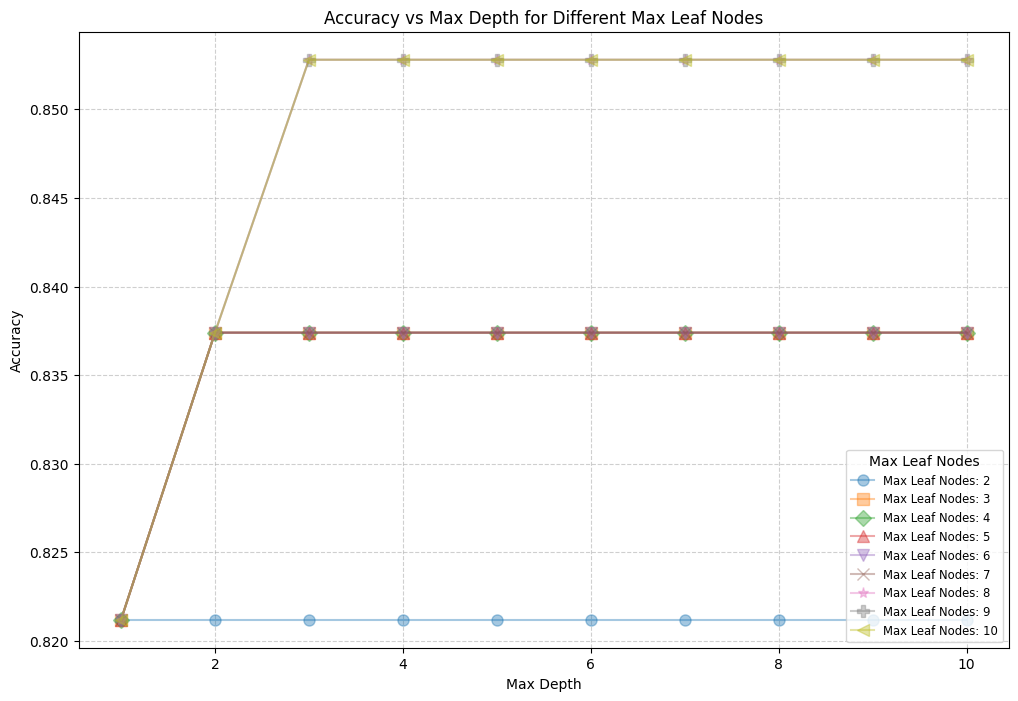

In [428]:
# Define marker styles to differentiate each line
marker_styles = ['o', 's', 'D', '^', 'v', 'x', '*', 'P', '<', '>']

plt.figure(figsize=(12, 8))

# Loop through unique values of max_leaf_nodes
for idx, max_leaf_nodes in enumerate(results_df['max_leaf_nodes'].unique()):
    subset = results_df[results_df['max_leaf_nodes'] == max_leaf_nodes]
    plt.plot(
        subset['max_depth'], 
        subset['accuracy'], 
        marker=marker_styles[idx % len(marker_styles)],
        label=f"Max Leaf Nodes: {max_leaf_nodes}",
        alpha=0.4,
        linewidth=1.5,
        markersize=8
    )

# Add labels, title, legend, and grid
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Different Max Leaf Nodes')
plt.legend(title="Max Leaf Nodes", loc='lower right', fontsize='small')  # Adjust legend size
plt.grid(True, linestyle='--', alpha=0.6)  # Lighter gridlines for better readability

# Show the plot
plt.show()

In [429]:
# Sort the DataFrame by accuracy (descending), then max_depth and max_leaf_nodes (ascending)
optimal_result = (
    results_df.sort_values(by=["accuracy", "max_depth", "max_leaf_nodes"], ascending=[False, True, True])
    .iloc[0]
)

# Display the result
print("Optimal Result:")
print(optimal_result)

Optimal Result:
max_depth         3.0000
max_leaf_nodes    8.0000
accuracy          0.8528
Name: 24, dtype: float64


In [430]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=8)

model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8528

 Confusion Matrix:
[[3681  130]
 [ 606  583]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.97      0.91      3811
        True       0.82      0.49      0.61      1189

    accuracy                           0.85      5000
   macro avg       0.84      0.73      0.76      5000
weighted avg       0.85      0.85      0.84      5000



In [431]:
plt.figure(figsize=(50,30), dpi=250)
plot_tree(model, fontsize=20, filled=True, feature_names=attr.columns)

[Text(0.5, 0.875, 'MonthlyIncome <= 5397.0\nentropy = 0.794\nsamples = 15000\nvalue = [11409, 3591]'),
 Text(0.25, 0.625, 'MonthlyIncome <= 3429.708\nentropy = 0.402\nsamples = 10167\nvalue = [9355, 812]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'NetWorth <= 233849.5\nentropy = 0.166\nsamples = 5940\nvalue = [5795, 145]'),
 Text(0.0625, 0.125, 'entropy = 0.098\nsamples = 5574\nvalue = [5503, 71]'),
 Text(0.1875, 0.125, 'entropy = 0.726\nsamples = 366\nvalue = [292, 74]'),
 Text(0.375, 0.375, 'NetWorth <= 160327.5\nentropy = 0.629\nsamples = 4227\nvalue = [3560, 667]'),
 Text(0.3125, 0.125, 'entropy = 0.528\nsamples = 3700\nvalue = [3258, 442]'),
 Text(0.4375, 0.125, 'entropy = 0.985\nsamples = 527\nvalue = [302, 225]'),
 Text(0.75, 0.625, 'MonthlyIncome <= 8480.958\nentropy = 0.984\nsamples = 4833\nvalue = [2054, 2779]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'NetWorth <= 134301.5\nentropy = 0.987\nsamples = 3033\nvalue = [1720.0, 1313.0]'),
 Text(0.5625, 0.125,

### Random Forest

In [432]:
# Splitting the dataset
attr = df_encoded.drop(columns = ['LoanApproved_1', 'RiskScore'])     # Features (without RiskScore)
target = df_encoded['LoanApproved_1']                                 # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)


results = []
n_estimators = [10, 50, 100, 200, 500]

# Loop through values for n_estimators
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=7)
    
    model.fit(attr_train,target_train)
    target_pred = model.predict(attr_test)

    results.append({
        "n_estimators": n,
        "accuracy": accuracy_score(target_test, target_pred)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="accuracy", ascending=False)

n_estimators  accuracy
4           500    0.9308
3           200    0.9302
2           100    0.9286
1            50    0.9246
0            10    0.9074

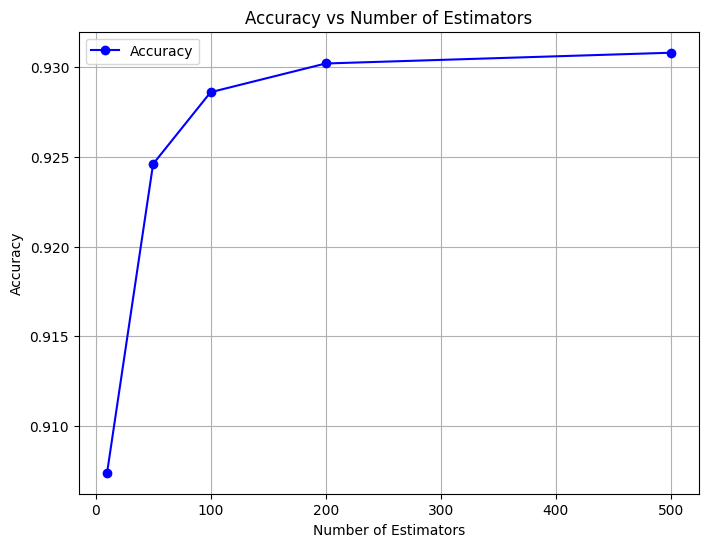

In [433]:
plt.figure(figsize=(8, 6))
plt.plot(results_df['n_estimators'], results_df['accuracy'], marker='o', linestyle='-', color='b', label='Accuracy')

# Adding labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')

# Display grid
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

In [434]:
model = RandomForestClassifier(n_estimators=50, random_state=7)
    
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.9246

 Confusion Matrix:
[[3712   99]
 [ 278  911]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      3811
        True       0.90      0.77      0.83      1189

    accuracy                           0.92      5000
   macro avg       0.92      0.87      0.89      5000
weighted avg       0.92      0.92      0.92      5000



In [435]:
# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy: {mean_decrease_accuracy}")

# Feature importance for Mean Decrease GINI
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI: {gini_importance}")

Mean Decrease Accuracy: [1.51336342e-02 1.53203800e-01 1.77399054e-02 1.41959913e-02
 3.82183459e-02 1.72284949e-02 6.18507389e-03 1.64475502e-02
 1.43077387e-02 8.37150211e-03 5.51343704e-03 1.37634535e-02
 4.17712850e-03 2.26426785e-02 1.40314614e-02 1.44193941e-02
 3.52654375e-02 1.43846398e-02 1.35491267e-01 8.49569052e-03
 3.81130593e-02 3.31067508e-02 6.93361953e-02 2.99799310e-02
 1.91041044e-01 1.40068417e-03 2.07784431e-03 2.49003220e-03
 3.15133184e-03 5.13581636e-03 4.55898701e-03 2.38608914e-03
 2.09985966e-03 1.24045134e-03 1.77783734e-03 2.16292263e-03
 3.04800300e-03 5.43467098e-03 1.91078954e-03 2.09804559e-03
 2.29461860e-03 1.64572782e-03 3.37463133e-05 2.61286182e-05
 9.07382038e-05 1.45040036e-04 2.28978573e-04 4.64669261e-04
 6.03894931e-04 6.98388162e-04 1.07811573e-03 1.20533516e-03
 1.29532728e-03 1.03945815e-03 1.26989913e-03 1.60410441e-03
 1.41508581e-03 1.60782920e-03 1.16901479e-03 1.64410590e-03
 1.21239845e-03 1.09451611e-03 1.05153266e-03 8.65639328e-04


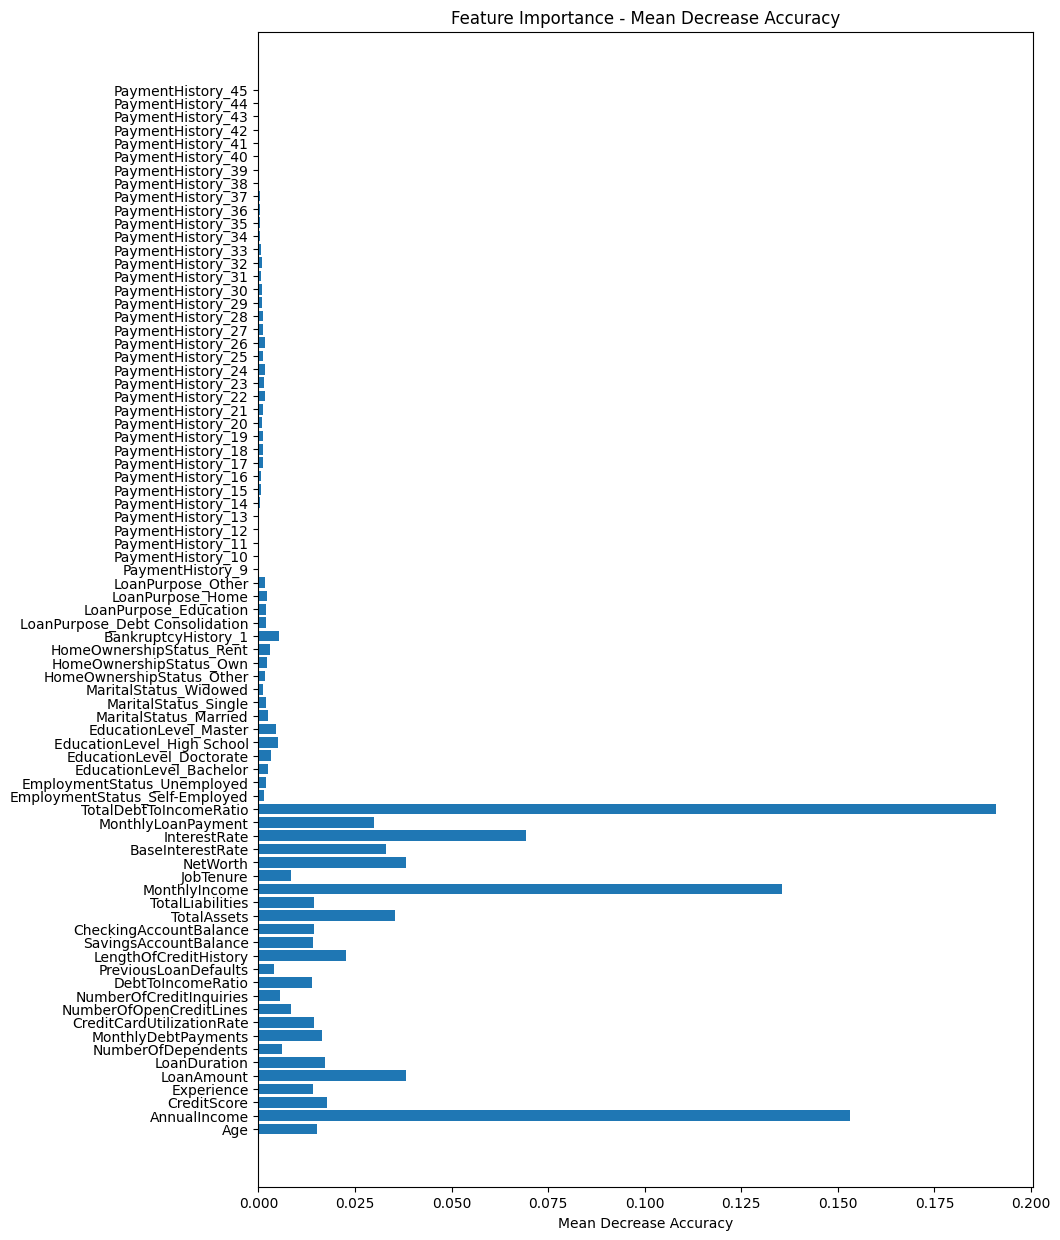

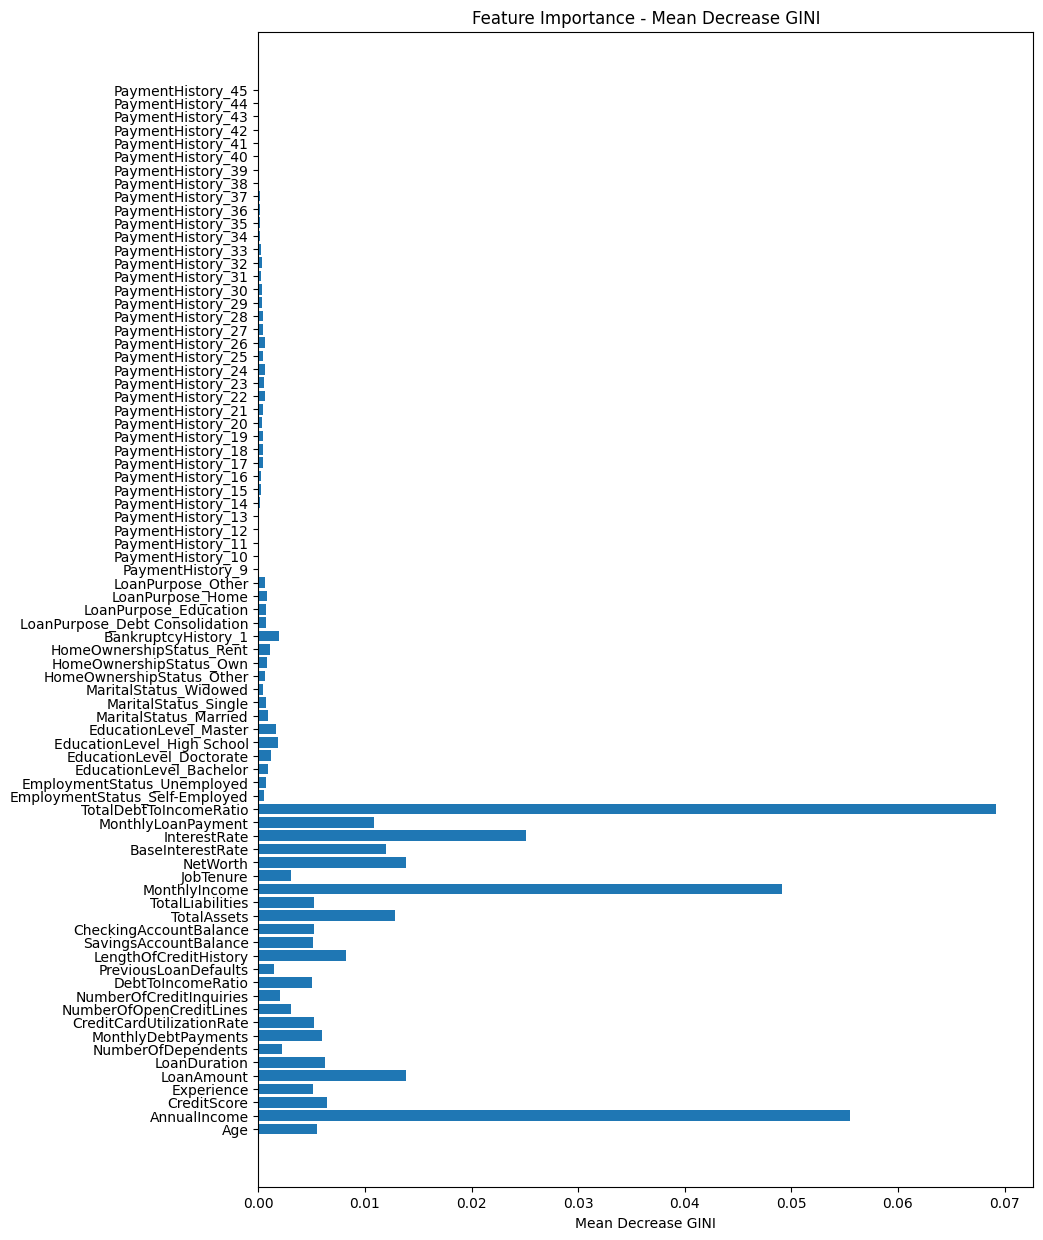

In [436]:
plt.figure(figsize=(10, 15))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 15))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [437]:
# List of features extracted from the given data
selected_features = list(significant_features['Feature'])

# Filter the DataFrame to include only the selected features (based off p-value)
attr = df_encoded[selected_features]            # Features
target = df_encoded['LoanApproved_1']           # Target Variable

# Splitting into 25% test, 75% training data
attr_train, attr_test, target_train, target_test = train_test_split(attr,
                                                                    target,
                                                                    test_size = 0.25,
                                                                    random_state = 3,
                                                                    shuffle = True)

results = []
n_estimators = [10, 50, 100, 200, 500]

# Loop through values for n_estimators
for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=7)
    
    model.fit(attr_train, target_train)
    target_pred = model.predict(attr_test)

    results.append({
        "n_estimators": n,
        "accuracy": accuracy_score(target_test, target_pred)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="accuracy", ascending=False)

n_estimators  accuracy
2           100    0.8766
4           500    0.8754
3           200    0.8746
1            50    0.8722
0            10    0.8648

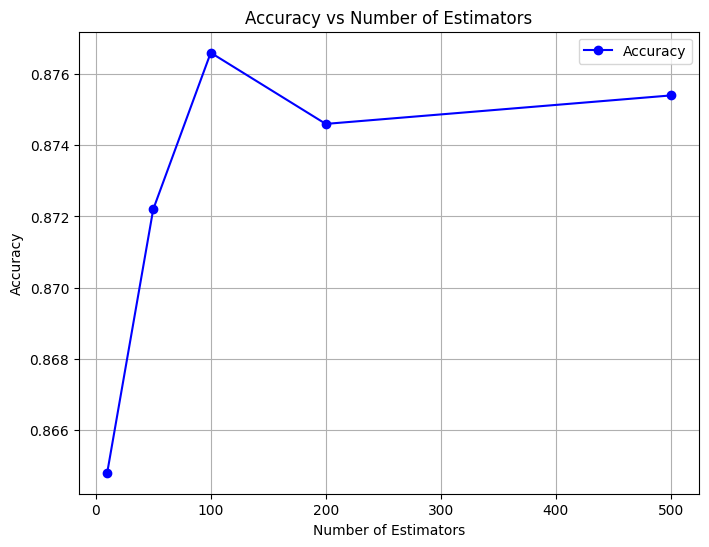

In [438]:
plt.figure(figsize=(8, 6))
plt.plot(results_df['n_estimators'], results_df['accuracy'], marker='o', linestyle='-', color='b', label='Accuracy')

# Adding labels and title
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')

# Display grid
plt.grid(True)

# Show the plot
plt.legend()
plt.show()

In [439]:
model = RandomForestClassifier(n_estimators=50, random_state=7)
    
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

print(f"Accuracy: {accuracy_score(target_test, target_pred)}")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test, target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test, target_pred))

Accuracy: 0.8722

 Confusion Matrix:
[[3628  183]
 [ 456  733]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.95      0.92      3811
        True       0.80      0.62      0.70      1189

    accuracy                           0.87      5000
   macro avg       0.84      0.78      0.81      5000
weighted avg       0.87      0.87      0.87      5000



In [440]:
# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy: {mean_decrease_accuracy}")

# Feature importance for Mean Decrease GINI
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI: {gini_importance}")

Mean Decrease Accuracy: [5.70259360e-02 2.50916574e-01 7.00633434e-02 5.25137204e-02
 4.63816041e-02 8.14315496e-03 6.27622570e-02 2.59156249e-01
 1.04341677e-01 6.51011858e-03 6.36173218e-03 8.74090556e-03
 7.06810086e-03 1.29427684e-02 1.01234012e-02 6.90625629e-03
 1.05295072e-02 7.96662512e-03 3.72985705e-03 5.44911871e-03
 1.28867702e-03 3.86929160e-04 5.92641265e-04 9.88451327e-05]

Mean Decrease GINI: [2.06680463e-02 9.09402939e-02 2.53932251e-02 1.90326733e-02
 1.68101957e-02 2.95134312e-03 2.27470749e-02 9.39266191e-02
 3.78168035e-02 2.35947784e-03 2.30569781e-03 3.16798730e-03
 2.56170869e-03 4.69087850e-03 3.66904849e-03 2.50305098e-03
 3.81623446e-03 2.88736299e-03 1.35182101e-03 1.97493712e-03
 4.67058292e-04 1.40235661e-04 2.14792391e-04 3.58246778e-05]


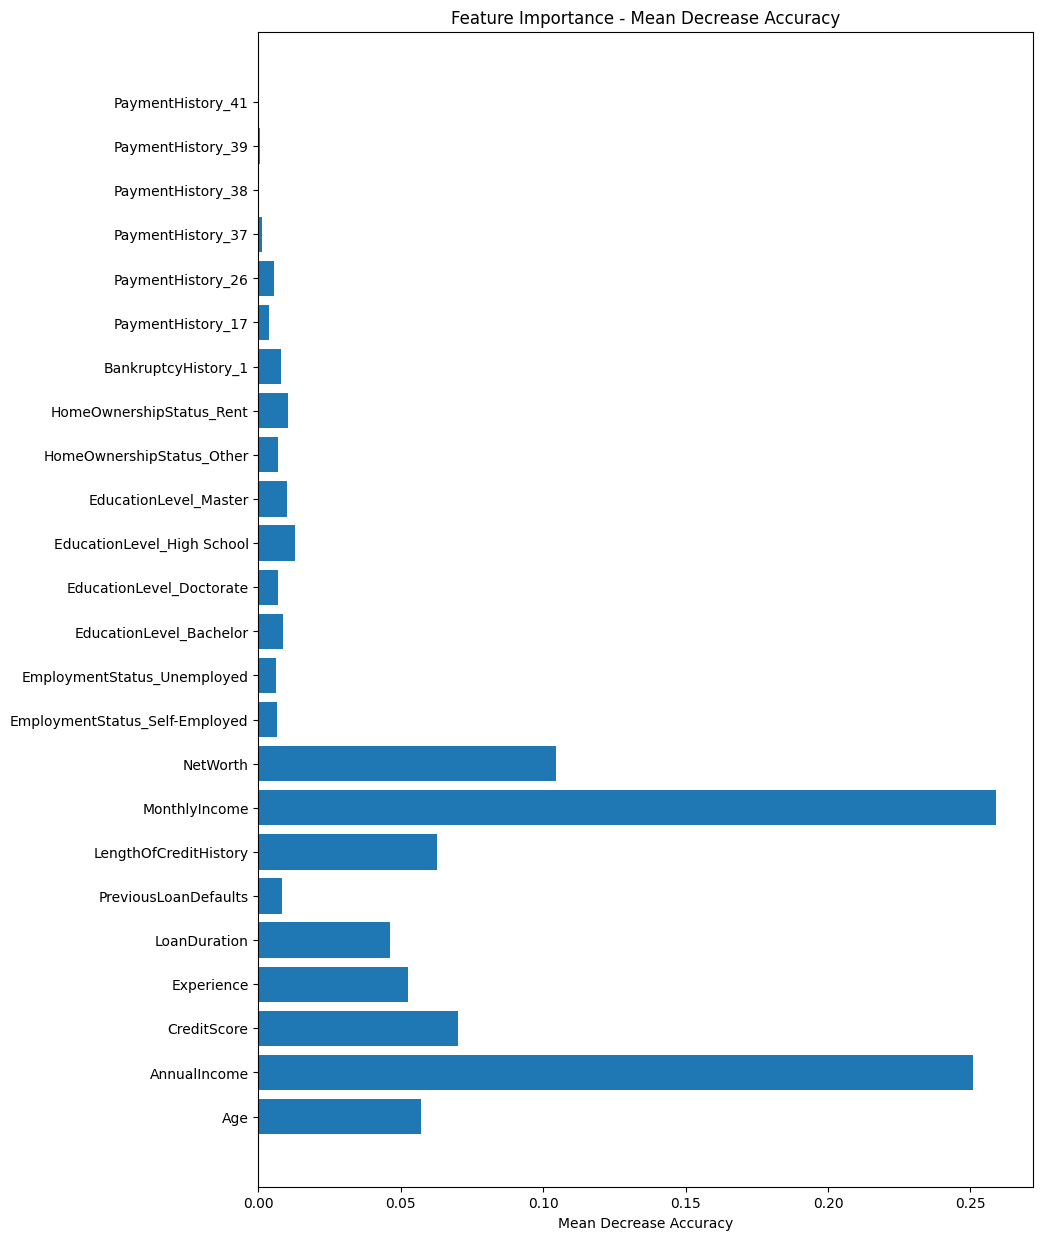

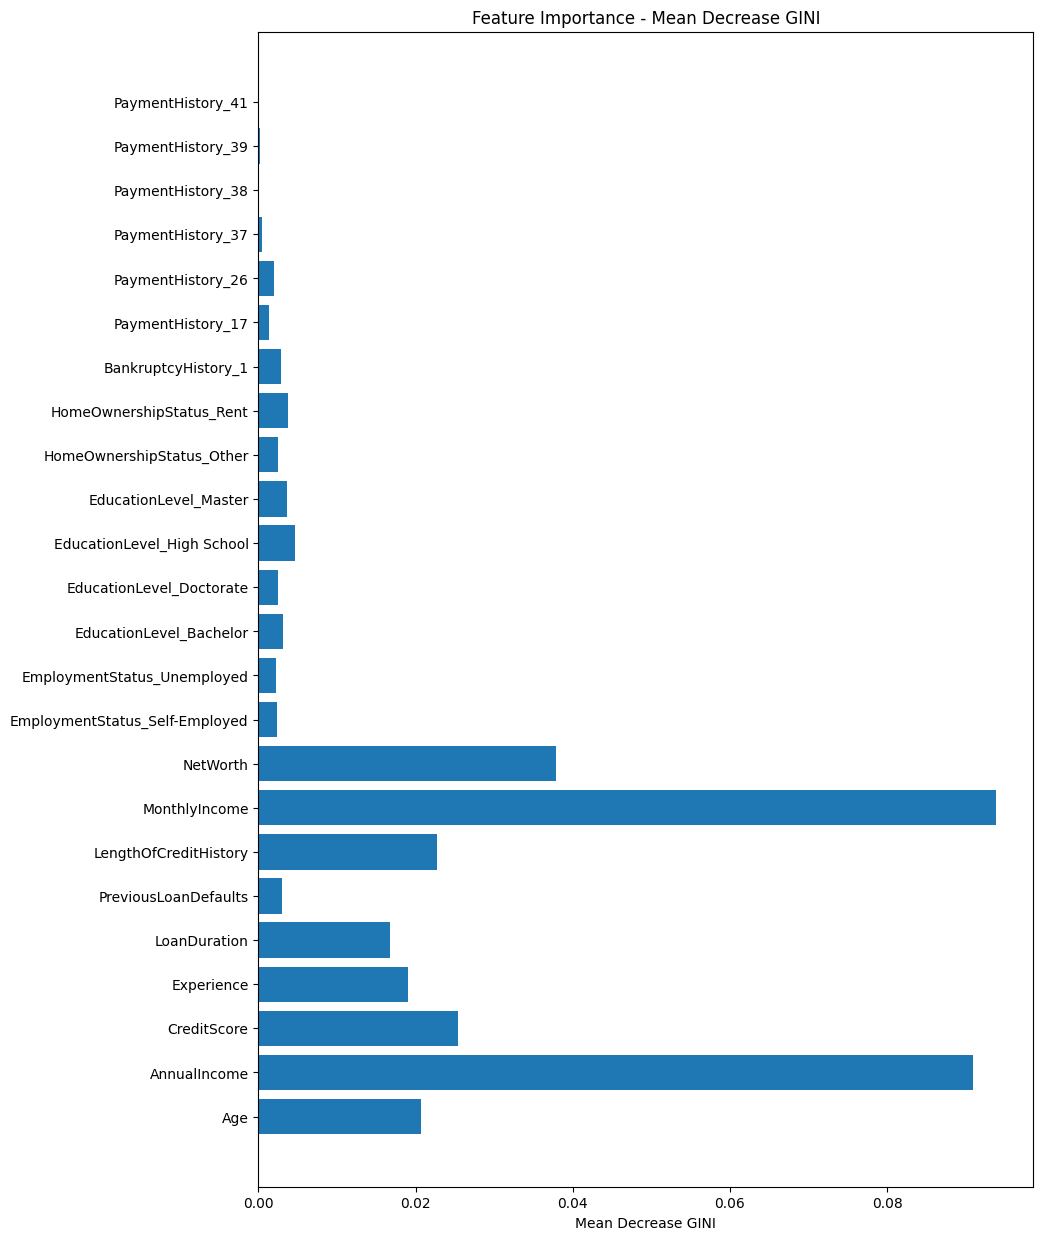

In [441]:
plt.figure(figsize=(10, 15))
plt.barh(range(len(mean_decrease_accuracy)), mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 15))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()